In [1]:
from os.path import join as pjoin
import sys 
sys.path.append('/home/hhansen/DecontextEmbeddings')
import os 
os.environ['EMBEDDING_EVALUATION_DATA_PATH'] = '/home/hhansen/DecontextEmbeddings/helpers/embedding_evaluation/data/'
DATA_DIR = '/home/hhansen/DecontextEmbeddings/data'
os.environ['DATA_DIR'] = DATA_DIR
FIGURE_OUTPUT_DIR = pjoin(DATA_DIR, 'figures', 'retraining')
import pickle 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import spearmanr, pearsonr
from scipy.spatial.distance import squareform
import numpy as np 
from collections import defaultdict

import os 

from helpers.things_evaluation.evaluate import evaluate
from helpers.plot import set_style_and_font_size
set_style_and_font_size()

/home/hhansen/DecontextEmbeddings/data


# Loss plots

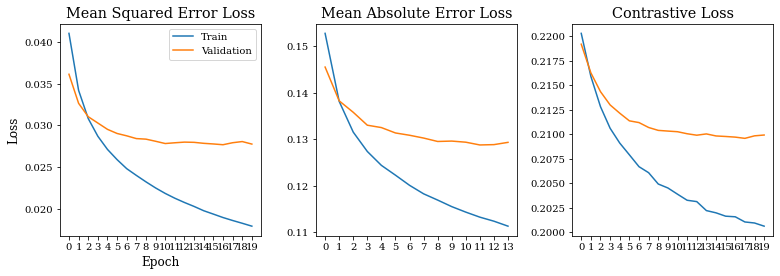

In [37]:
fig, axes = plt.subplots(1,3, figsize=(11,4))

def plot(ax, losses, loss_name):
    epochs = range(0, len(losses['train_epoch_losses']))
    ax.plot(epochs, losses['train_epoch_losses'], label='Train')
    ax.plot(epochs, losses['val_epoch_losses'], label='Validation')
    ax.set_xticks(epochs)


comb = [('mse', 'Mean Squared Error Loss'), ('mae', 'Mean Absolute Error Loss'), ('contrastive', 'Contrastive Loss')]
for i, _ in enumerate(comb):
    file_name, loss_name = _
    with open(pjoin(DATA_DIR, 'retraining', file_name, 'losses.npy'), 'rb') as loss_f:
        losses = pickle.load(loss_f)
        axes[i].set_title(loss_name)
        plot(axes[i], losses, loss_name)

axes[0].legend()
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
plt.tight_layout()
plt.savefig(pjoin(FIGURE_OUTPUT_DIR, 'loss.pdf'), bbox_inches='tight')

# Correlations

In [38]:
matching = 'word'
results = defaultdict(lambda: defaultdict(list))

test_words = list(pd.read_csv(pjoin(DATA_DIR, 'retraining/test_words.txt'), header=None, names=['words'])['words'])
train_words = list(pd.read_csv(pjoin(DATA_DIR, 'retraining/train_words.txt'), header=None, names=['words'])['words'])
val_words = list(pd.read_csv(pjoin(DATA_DIR, 'retraining/val_words.txt'), header=None, names=['words'])['words'])

for mode, words in [('Train', train_words), ('Validation', val_words), ('Test', test_words)]:
    for file_name in ['mse', 'contrastive', 'mae', 'decontext']:
        for layer in range(13):
            path = pjoin(DATA_DIR, f'embeddings/data_fine_tune/things/wikidumps/decontext/bert-base/{str(layer)}/{matching}/mean/all/{file_name}.txt')
            pearson, spearman, matrix, vec= evaluate(path, matching=matching, matching_words=words)
            results[mode][file_name].append(spearman.correlation)

number of rows: Index(['abacus', 'air_conditioner', 'airboat', 'aloe', 'aluminum_foil',
       'ambulance', 'amplifier', 'anchor', 'ankle', 'antelope',
       ...
       'windsock', 'wine_cooler', 'wire_cutters', 'wood', 'workbench', 'worm',
       'wrap', 'yak', 'yolk', 'zucchini'],
      dtype='object', name='things_id', length=501)
number of rows: Index(['abacus', 'air_conditioner', 'airboat', 'aloe', 'aluminum_foil',
       'ambulance', 'amplifier', 'anchor', 'ankle', 'antelope',
       ...
       'windsock', 'wine_cooler', 'wire_cutters', 'wood', 'workbench', 'worm',
       'wrap', 'yak', 'yolk', 'zucchini'],
      dtype='object', name='things_id', length=501)
number of rows: Index(['abacus', 'air_conditioner', 'airboat', 'aloe', 'aluminum_foil',
       'ambulance', 'amplifier', 'anchor', 'ankle', 'antelope',
       ...
       'windsock', 'wine_cooler', 'wire_cutters', 'wood', 'workbench', 'worm',
       'wrap', 'yak', 'yolk', 'zucchini'],
      dtype='object', name='things_id', l

number of rows: Index(['abacus', 'air_conditioner', 'airboat', 'aloe', 'aluminum_foil',
       'ambulance', 'amplifier', 'anchor', 'ankle', 'antelope',
       ...
       'windsock', 'wine_cooler', 'wire_cutters', 'wood', 'workbench', 'worm',
       'wrap', 'yak', 'yolk', 'zucchini'],
      dtype='object', name='things_id', length=501)
number of rows: Index(['abacus', 'air_conditioner', 'airboat', 'aloe', 'aluminum_foil',
       'ambulance', 'amplifier', 'anchor', 'ankle', 'antelope',
       ...
       'windsock', 'wine_cooler', 'wire_cutters', 'wood', 'workbench', 'worm',
       'wrap', 'yak', 'yolk', 'zucchini'],
      dtype='object', name='things_id', length=501)
number of rows: Index(['abacus', 'air_conditioner', 'airboat', 'aloe', 'aluminum_foil',
       'ambulance', 'amplifier', 'anchor', 'ankle', 'antelope',
       ...
       'windsock', 'wine_cooler', 'wire_cutters', 'wood', 'workbench', 'worm',
       'wrap', 'yak', 'yolk', 'zucchini'],
      dtype='object', name='things_id', l

number of rows: Index(['abacus', 'air_conditioner', 'airboat', 'aloe', 'aluminum_foil',
       'ambulance', 'amplifier', 'anchor', 'ankle', 'antelope',
       ...
       'windsock', 'wine_cooler', 'wire_cutters', 'wood', 'workbench', 'worm',
       'wrap', 'yak', 'yolk', 'zucchini'],
      dtype='object', name='things_id', length=501)
number of rows: Index(['abacus', 'air_conditioner', 'airboat', 'aloe', 'aluminum_foil',
       'ambulance', 'amplifier', 'anchor', 'ankle', 'antelope',
       ...
       'windsock', 'wine_cooler', 'wire_cutters', 'wood', 'workbench', 'worm',
       'wrap', 'yak', 'yolk', 'zucchini'],
      dtype='object', name='things_id', length=501)
number of rows: Index(['aircraft_carrier', 'album', 'almond', 'altar', 'anvil', 'baby',
       'baklava', 'bamboo', 'baseball_bat', 'batter',
       ...
       'vase', 'vent', 'wetsuit', 'whale', 'wheel', 'whistle', 'window',
       'wine_bottle', 'wrapping_paper', 'zebra'],
      dtype='object', name='things_id', length=216

number of rows: Index(['aircraft_carrier', 'album', 'almond', 'altar', 'anvil', 'baby',
       'baklava', 'bamboo', 'baseball_bat', 'batter',
       ...
       'vase', 'vent', 'wetsuit', 'whale', 'wheel', 'whistle', 'window',
       'wine_bottle', 'wrapping_paper', 'zebra'],
      dtype='object', name='things_id', length=216)
number of rows: Index(['aircraft_carrier', 'album', 'almond', 'altar', 'anvil', 'baby',
       'baklava', 'bamboo', 'baseball_bat', 'batter',
       ...
       'vase', 'vent', 'wetsuit', 'whale', 'wheel', 'whistle', 'window',
       'wine_bottle', 'wrapping_paper', 'zebra'],
      dtype='object', name='things_id', length=216)
number of rows: Index(['aircraft_carrier', 'album', 'almond', 'altar', 'anvil', 'baby',
       'baklava', 'bamboo', 'baseball_bat', 'batter',
       ...
       'vase', 'vent', 'wetsuit', 'whale', 'wheel', 'whistle', 'window',
       'wine_bottle', 'wrapping_paper', 'zebra'],
      dtype='object', name='things_id', length=216)
number of rows: 

number of rows: Index(['aircraft_carrier', 'album', 'almond', 'altar', 'anvil', 'baby',
       'baklava', 'bamboo', 'baseball_bat', 'batter',
       ...
       'vase', 'vent', 'wetsuit', 'whale', 'wheel', 'whistle', 'window',
       'wine_bottle', 'wrapping_paper', 'zebra'],
      dtype='object', name='things_id', length=216)
number of rows: Index(['aircraft_carrier', 'album', 'almond', 'altar', 'anvil', 'baby',
       'baklava', 'bamboo', 'baseball_bat', 'batter',
       ...
       'vase', 'vent', 'wetsuit', 'whale', 'wheel', 'whistle', 'window',
       'wine_bottle', 'wrapping_paper', 'zebra'],
      dtype='object', name='things_id', length=216)
number of rows: Index(['aircraft_carrier', 'album', 'almond', 'altar', 'anvil', 'baby',
       'baklava', 'bamboo', 'baseball_bat', 'batter',
       ...
       'vase', 'vent', 'wetsuit', 'whale', 'wheel', 'whistle', 'window',
       'wine_bottle', 'wrapping_paper', 'zebra'],
      dtype='object', name='things_id', length=216)
number of rows: 

number of rows: Index(['aardvark', 'accordion', 'acorn', 'air_mattress', 'air_pump', 'airbag',
       'airplane', 'alligator', 'alpaca', 'amber',
       ...
       'wreck', 'wrench', 'wrist', 'xylophone', 'yacht', 'yarn', 'yo-yo',
       'yogurt', 'yoke', 'zipper'],
      dtype='object', name='things_id', length=1077)
number of rows: Index(['aardvark', 'accordion', 'acorn', 'air_mattress', 'air_pump', 'airbag',
       'airplane', 'alligator', 'alpaca', 'amber',
       ...
       'wreck', 'wrench', 'wrist', 'xylophone', 'yacht', 'yarn', 'yo-yo',
       'yogurt', 'yoke', 'zipper'],
      dtype='object', name='things_id', length=1077)
number of rows: Index(['aardvark', 'accordion', 'acorn', 'air_mattress', 'air_pump', 'airbag',
       'airplane', 'alligator', 'alpaca', 'amber',
       ...
       'wreck', 'wrench', 'wrist', 'xylophone', 'yacht', 'yarn', 'yo-yo',
       'yogurt', 'yoke', 'zipper'],
      dtype='object', name='things_id', length=1077)
number of rows: Index(['aardvark', 'acco

number of rows: Index(['aardvark', 'accordion', 'acorn', 'air_mattress', 'air_pump', 'airbag',
       'airplane', 'alligator', 'alpaca', 'amber',
       ...
       'wreck', 'wrench', 'wrist', 'xylophone', 'yacht', 'yarn', 'yo-yo',
       'yogurt', 'yoke', 'zipper'],
      dtype='object', name='things_id', length=1077)
number of rows: Index(['aardvark', 'accordion', 'acorn', 'air_mattress', 'air_pump', 'airbag',
       'airplane', 'alligator', 'alpaca', 'amber',
       ...
       'wreck', 'wrench', 'wrist', 'xylophone', 'yacht', 'yarn', 'yo-yo',
       'yogurt', 'yoke', 'zipper'],
      dtype='object', name='things_id', length=1077)
number of rows: Index(['aardvark', 'accordion', 'acorn', 'air_mattress', 'air_pump', 'airbag',
       'airplane', 'alligator', 'alpaca', 'amber',
       ...
       'wreck', 'wrench', 'wrist', 'xylophone', 'yacht', 'yarn', 'yo-yo',
       'yogurt', 'yoke', 'zipper'],
      dtype='object', name='things_id', length=1077)
number of rows: Index(['aardvark', 'acco

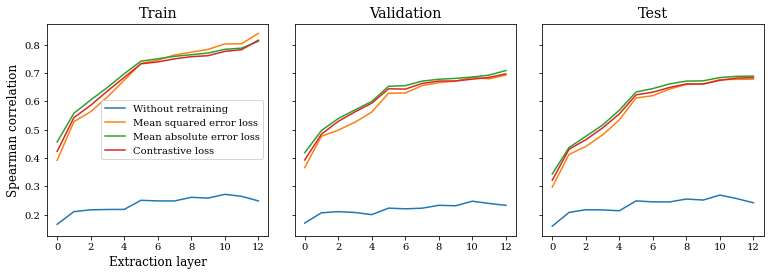

In [39]:
layers = range(13)

fig, axes = plt.subplots(1,3, figsize=(11,4), sharey=True)

combs = ['Train', 'Validation', 'Test']

for i, mode in enumerate(combs):
    axes[i].plot(layers, results[mode]['decontext'], label='Without retraining')
    axes[i].plot(layers, results[mode]['mse'], label='Mean squared error loss')
    axes[i].plot(layers, results[mode]['mae'], label='Mean absolute error loss')
    axes[i].plot(layers, results[mode]['contrastive'], label='Contrastive loss')

    axes[i].set_title(mode)


axes[0].set_ylabel('Spearman correlation')
axes[0].set_xlabel('Extraction layer')
axes[0].legend()
plt.tight_layout()
plt.savefig(pjoin(FIGURE_OUTPUT_DIR, 'finetune_test_correlation.pdf'), bbox_inches='tight')